In [13]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
folder_selected = r'D:\DataSet\MySpaces\data'
# power = loading_from_listfolder(folder_selected,'ERDS_phase_coupling_data') # for ERDS method

power = loading_from_listfolder(folder_selected,'power_events_agency_ERDS') # for BandPower method

chan = pickle.load(open(r'D:/DataSet/MySpaces/data/s05/epochs_ERDS','rb'))
chan = chan.ch_names


var2Load = r"D:/results/Results_ANS/subjectFolderExperiment/s03\epochs_ERDS"
info_chan = pickle.load(open(var2Load,'rb')).info

folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')

D:\DataSet\MySpaces\data\pilot_giulia
D:\DataSet\MySpaces\data\pilot_michele
D:\DataSet\MySpaces\data\pilot_nico
D:\DataSet\MySpaces\data\pilot_nicolas
D:\DataSet\MySpaces\data\s05
D:\DataSet\MySpaces\data\s06
D:\DataSet\MySpaces\data\s07
D:\DataSet\MySpaces\data\s08
D:\DataSet\MySpaces\data\s09
D:\DataSet\MySpaces\data\s10
D:\DataSet\MySpaces\data\s12
D:\DataSet\MySpaces\data\s13
D:\DataSet\MySpaces\data\s14
D:\DataSet\MySpaces\data\s15
**** Grand Average folder exists already ****


# Phase coupling analysis

In [15]:
GA_power_events = dict()
for iEvent,event_type in enumerate(power[0].keys()):
    print(event_type)
    for i,thesePowers in enumerate(power):
        if i == 0:
            GA_power = np.expand_dims(thesePowers[event_type],axis=0)              
        else:
            GA_power = np.concatenate((GA_power,np.expand_dims(thesePowers[event_type],axis=0)),axis=0)   
                
    GA_power_events.update({event_type:GA_power})

Mu ST_ACTION_SELF
Mu ST_ACTION_CUE
Beta ST_ACTION_SELF
Beta ST_ACTION_CUE


In [16]:
len(GA_power_events['Beta ST_ACTION_CUE'])

14

Mu ST_ACTION_SELF
(14, 6, 61)
Mu ST_ACTION_CUE
(14, 6, 61)
Beta ST_ACTION_SELF
(14, 6, 61)
Beta ST_ACTION_CUE
(14, 6, 61)


<Figure size 1440x576 with 0 Axes>

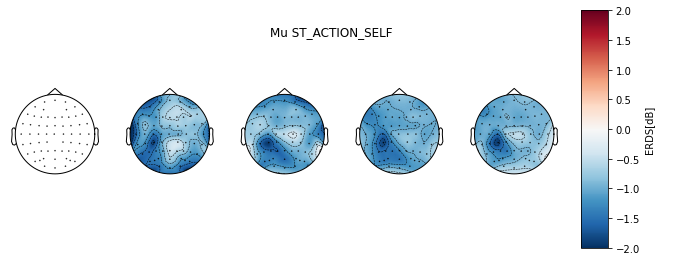

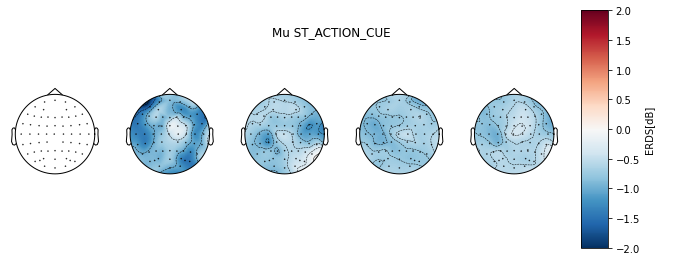

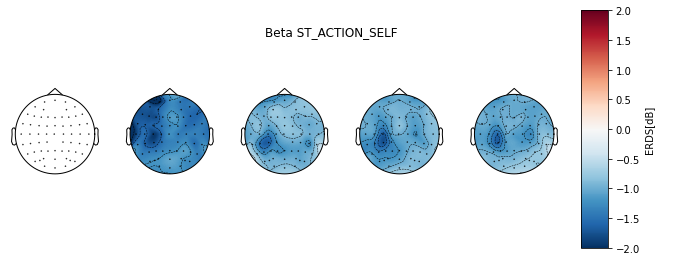

In [ ]:
import seaborn as sns
import pandas as pd
from utils.utils_normalization import zscore_over_trials


fig = plt.figure(figsize=(20,8))

iplot = 0
df_events = dict()


# scale = [-2.5,2.5] #ERDS

nbins = 6
scale = [-2,2] #ERDS
my_cmap_r = reverse_colourmap(plt.cm.RdBu, name = 'RdBu')
my_cmap_r = center_cmap(my_cmap_r, scale[0], scale[1])  # zero maps to white

power_phase_av = dict()
path = os.path.join(folderGA,'ERDS_Agency')

for i,event_band in enumerate(GA_power_events.keys()):
        print(event_band)
        iplot +=1
 
        # bandpower
        data_mu = GA_power_events[event_band]
        print(np.shape(data_mu))
        data_mu = np.nanmean(data_mu,axis=0)
        # Visualization
        fig, axes = plt.subplots(1, nbins,figsize=(12, 4))
        for i,ax in enumerate(axes[:-1]):
            this_phase_data = data_mu[i,:]
            ax = mne.viz.plot_topomap(this_phase_data,info_chan,axes=ax, 
                           cmap=my_cmap_r,
                           vmin=scale[0], vmax=scale[1],show = False)
            
        axes[-1].axis('off')
        divider = make_axes_locatable(axes[-1])
        cax = divider.append_axes('left', size='40%')
        cb = fig.colorbar(axes[0].images[-1], cax=cax, pad=0.05)
        cb.ax.set_ylabel('ERDS[dB]')
        fig.suptitle(event_band,y=0.9)
        event_type = "topoplot_mean" + event_band
        saving_figure(event_type,path,fig)